### Nome: Bruna

### Exercicio

* Montem uma classificacao utilizando a base da Veltec ou Senai

* Monte testes de avaliacao de diferentes classificadores considerando:¶
    
    
    * Busca por hiperparametros (Considere testar parametros de regularizacao)
    * Busca por features
    * Utilize um metodo de validacao cruzada


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

/home/hub/anaconda3/envs/fiep/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

vigencias = pd.read_csv('vigencias_scores.csv')
medias = pd.read_csv('drivers_medias.csv')

* Visualizacao da Tabela Geral

In [3]:
vigencias

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral,rank
0,66486,2855,636779.0,2950.0,234.420,0.0,0.0,0.0,0.0,0.0,...,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,50.000000,ruim
1,8155,3321,636786.0,2950.0,114.083,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.962685,regular
2,8577,3327,636592.0,2950.0,183.725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,otimo
3,7665,3581,636644.0,2950.0,702.525,0.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.437814,otimo
4,8427,2868,636989.0,2950.0,175.290,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.308403,bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637,65042,3922,394861.0,3922.0,45.261,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,otimo
12638,22689,3327,636609.0,2950.0,433.054,0.0,0.0,0.0,2.0,0.0,...,1.0,2858.0,728.0,416.0,0.0,0.0,0.0,0.0,47.228983,ruim
12639,24403,2870,636570.0,2950.0,185.515,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5213.0,0.0,0.0,0.0,0.0,50.000000,ruim
12640,9853,2868,636811.0,2950.0,451.450,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.354746,otimo


* Visualizacao das colunas

In [4]:
vigencias.columns

Index(['id_vei', 'id_uo_vei', 'id_motorista', 'id_uo_motorista',
       'distancia_percorrida_km', 'qtd_banguela', 'qtd_curvas',
       'qtd_aceleracoes', 'qtd_frenagens', 'qtd_vel_faixa_1',
       'qtd_vel_faixa_2', 'qtd_vel_faixa_3', 'tempo_vel_faixa_1',
       'tempo_vel_faixa_2', 'tempo_vel_faixa_3', 'qtd_vel_via_faixa_1',
       'qtd_vel_via_faixa_2', 'qtd_vel_via_faixa_3', 'tempo_vel_via_faixa_1',
       'tempo_vel_via_faixa_2', 'tempo_vel_via_faixa_3',
       'qtd_manuseio_celular', 'qtd_fadiga_motorista',
       'qtd_distracao_motorista', 'qtd_uso_cigarro', 'score_geral', 'rank'],
      dtype='object')

* Tamanho do banco de dados

In [5]:
vigencias.shape

(12642, 27)

* Tipos de dados

In [6]:
vigencias.dtypes

id_vei                       int64
id_uo_vei                    int64
id_motorista               float64
id_uo_motorista            float64
distancia_percorrida_km    float64
qtd_banguela               float64
qtd_curvas                 float64
qtd_aceleracoes            float64
qtd_frenagens              float64
qtd_vel_faixa_1            float64
qtd_vel_faixa_2            float64
qtd_vel_faixa_3            float64
tempo_vel_faixa_1          float64
tempo_vel_faixa_2          float64
tempo_vel_faixa_3          float64
qtd_vel_via_faixa_1        float64
qtd_vel_via_faixa_2        float64
qtd_vel_via_faixa_3        float64
tempo_vel_via_faixa_1      float64
tempo_vel_via_faixa_2      float64
tempo_vel_via_faixa_3      float64
qtd_manuseio_celular       float64
qtd_fadiga_motorista       float64
qtd_distracao_motorista    float64
qtd_uso_cigarro            float64
score_geral                float64
rank                        object
dtype: object

* Qde de valores nulos

In [7]:
vigencias.isnull().sum()

id_vei                     0
id_uo_vei                  0
id_motorista               0
id_uo_motorista            0
distancia_percorrida_km    0
qtd_banguela               0
qtd_curvas                 0
qtd_aceleracoes            0
qtd_frenagens              0
qtd_vel_faixa_1            0
qtd_vel_faixa_2            0
qtd_vel_faixa_3            0
tempo_vel_faixa_1          0
tempo_vel_faixa_2          0
tempo_vel_faixa_3          0
qtd_vel_via_faixa_1        0
qtd_vel_via_faixa_2        0
qtd_vel_via_faixa_3        0
tempo_vel_via_faixa_1      0
tempo_vel_via_faixa_2      0
tempo_vel_via_faixa_3      0
qtd_manuseio_celular       0
qtd_fadiga_motorista       0
qtd_distracao_motorista    0
qtd_uso_cigarro            0
score_geral                0
rank                       0
dtype: int64

* Quantidade de ranks

In [8]:
pd.unique(vigencias["rank"])

array(['ruim', 'regular', 'otimo', 'bom', 'pessimo'], dtype=object)

In [9]:
vigencias.groupby('rank').count()

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_2,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral
rank,,,,,,,,,,,,,,,,,,,,,
bom,992,992,992,992,992,992,992,992,992,992,...,992,992,992,992,992,992,992,992,992,992
otimo,7729,7729,7729,7729,7729,7729,7729,7729,7729,7729,...,7729,7729,7729,7729,7729,7729,7729,7729,7729,7729
pessimo,592,592,592,592,592,592,592,592,592,592,...,592,592,592,592,592,592,592,592,592,592
regular,960,960,960,960,960,960,960,960,960,960,...,960,960,960,960,960,960,960,960,960,960
ruim,2369,2369,2369,2369,2369,2369,2369,2369,2369,2369,...,2369,2369,2369,2369,2369,2369,2369,2369,2369,2369


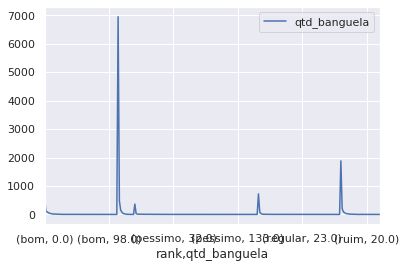

In [10]:
vigencias.groupby('rank')['qtd_banguela'].value_counts().plot(legend = True, grid = True)

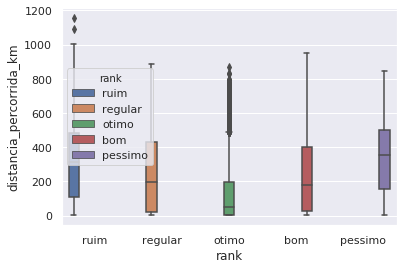

In [11]:
sns.boxplot(x ='rank', y='distancia_percorrida_km', hue = 'rank', data = vigencias)

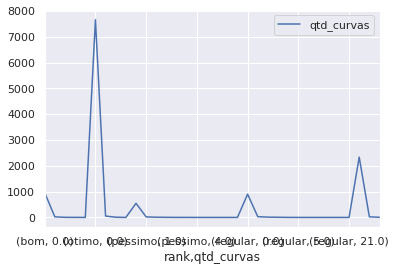

In [12]:
vigencias.groupby('rank')['qtd_curvas'].value_counts().plot(legend = True, grid = True)

In [13]:
vigencias.corr()

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_2,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral
id_vei,1.000000,0.260267,-0.607052,-0.146060,-0.468359,0.018997,-0.003944,-0.034534,-0.208476,-0.041497,...,-0.167589,-0.209835,-0.108842,-0.100099,-0.190684,0.014165,0.018836,0.030054,0.016472,0.239271
id_uo_vei,0.260267,1.000000,-0.592017,-0.405818,-0.502083,-0.191173,-0.003721,-0.074223,-0.223571,0.025628,...,-0.175308,-0.205110,-0.117207,-0.084294,-0.134859,-0.027428,-0.040346,-0.016023,-0.019291,0.285578
id_motorista,-0.607052,-0.592017,1.000000,0.469942,0.685202,0.100519,-0.002408,0.029907,0.284563,0.020423,...,0.244040,0.274255,0.172473,0.123360,0.188428,0.009642,0.012088,0.032199,0.016316,-0.333090
id_uo_motorista,-0.146060,-0.405818,0.469942,1.000000,0.424888,0.055850,0.023578,-0.019209,0.131256,-0.074286,...,0.098083,0.127204,0.064832,0.047975,0.092167,0.004814,0.006033,0.016937,0.008149,-0.031990
distancia_percorrida_km,-0.468359,-0.502083,0.685202,0.424888,1.000000,0.188350,0.020351,0.030722,0.299772,0.110898,...,0.321834,0.363335,0.262547,0.162270,0.249901,0.036442,0.015119,0.025419,0.031066,-0.375121
qtd_banguela,0.018997,-0.191173,0.100519,0.055850,0.188350,1.000000,-0.006019,-0.006473,-0.014782,-0.013182,...,0.056039,0.067132,0.059030,0.010801,0.013402,-0.001468,-0.001839,-0.005007,-0.002484,-0.172420
qtd_curvas,-0.003944,-0.003721,-0.002408,0.023578,0.020351,-0.006019,1.000000,0.092401,0.145036,0.104036,...,0.012957,0.009863,0.002051,0.005346,-0.002705,-0.000511,-0.000640,-0.000805,-0.000865,-0.060904
qtd_aceleracoes,-0.034534,-0.074223,0.029907,-0.019209,0.030722,-0.006473,0.092401,1.000000,0.159308,0.023471,...,0.066007,0.062765,0.034566,0.024611,0.001368,-0.001454,0.010770,0.034983,0.017457,-0.144895
qtd_frenagens,-0.208476,-0.223571,0.284563,0.131256,0.299772,-0.014782,0.145036,0.159308,1.000000,0.062915,...,0.221867,0.215125,0.091911,0.125519,0.093751,0.016693,0.008662,-0.001447,0.003575,-0.355721
qtd_vel_faixa_1,-0.041497,0.025628,0.020423,-0.074286,0.110898,-0.013182,0.104036,0.023471,0.062915,1.000000,...,0.067295,0.069220,0.152444,0.032301,0.005941,0.007500,0.001344,-0.003373,0.000092,-0.301322


* Tratamento de variaveis categoricas

In [14]:
from sklearn import preprocessing

categ_encod = preprocessing.LabelEncoder()

vigencias["rank"] = categ_encod.fit_transform(vigencias["rank"])

vigencias["rank"]


0        4
1        3
2        1
3        1
4        0
        ..
12637    1
12638    4
12639    4
12640    1
12641    1
Name: rank, Length: 12642, dtype: int64

* Features e Target

In [18]:
y =  vigencias["rank"] 

X = vigencias.drop(["rank"], axis = 1)

In [19]:
y

0        4
1        3
2        1
3        1
4        0
        ..
12637    1
12638    4
12639    4
12640    1
12641    1
Name: rank, Length: 12642, dtype: int64

In [20]:
X

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_2,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral
0,66486,2855,636779.0,2950.0,234.420,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,50.000000
1,8155,3321,636786.0,2950.0,114.083,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.962685
2,8577,3327,636592.0,2950.0,183.725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000
3,7665,3581,636644.0,2950.0,702.525,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.437814
4,8427,2868,636989.0,2950.0,175.290,0.0,0.0,1.0,3.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.308403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637,65042,3922,394861.0,3922.0,45.261,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000
12638,22689,3327,636609.0,2950.0,433.054,0.0,0.0,0.0,2.0,0.0,...,2.0,1.0,2858.0,728.0,416.0,0.0,0.0,0.0,0.0,47.228983
12639,24403,2870,636570.0,2950.0,185.515,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,0.0,0.0,5213.0,0.0,0.0,0.0,0.0,50.000000
12640,9853,2868,636811.0,2950.0,451.450,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.354746


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### Inicio da Papeline

In [22]:
pipe_lr = Pipeline( [ ('scl', StandardScaler()), ('clf', LogisticRegression()) ] )
pipe_knn = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())])
pipe_dt = Pipeline([('scl', StandardScaler()), ('clf', DecisionTreeClassifier())])

# Lista de pipelines a serem executados
pipelines = [pipe_lr, pipe_knn, pipe_dt]

# Dicionário para facilitar identificacao
pipe_dict = {0: 'Logistic Regression', 1: 'KNN', 2: 'Decision Tree'}

# aplicando fit
# Generaliza a execucao do fit de cada ultima funcao do pipe
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compara acurácia
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# para cada modelo treinado obtem val score
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    # Descobre o melhor val.score e armazen em best_clf
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

/home/hub/anaconda3/envs/fiep/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression pipeline test accuracy: 0.984
KNN pipeline test accuracy: 0.921
Decision Tree pipeline test accuracy: 1.000
Classifier with best accuracy: Decision Tree


### Busca por Hiperparametros

In [23]:
# Set the parameters by cross-validation
tuned_parameters = [{'alpha': [1, 10, 100, 1000]},]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = GridSearchCV(
        RidgeClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/home/hub/anaconda3/envs/fiep/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hub/anaconda3/envs/fiep/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hub/anaconda3/envs/fiep/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hub/anaconda3/envs/fiep/lib/python3.7/site-

Best parameters set found on development set:

{'alpha': 1000}

Grid scores on development set:

0.637 (+/-0.045) for {'alpha': 1}
0.637 (+/-0.045) for {'alpha': 10}
0.636 (+/-0.037) for {'alpha': 100}
0.638 (+/-0.036) for {'alpha': 1000}

classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       292
           1       0.83      1.00      0.91      2326
           2       0.70      0.22      0.34       167
           3       0.96      0.09      0.17       286
           4       0.78      0.99      0.87       722

    accuracy                           0.82      3793
   macro avg       0.65      0.46      0.46      3793
weighted avg       0.76      0.82      0.75      3793


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'alpha': 1}

Grid scores on development set:

0.463 (+/-0.023) for {'alpha': 1}
0.463 (+/-0.023) for {'alpha': 10}
0.462 (+/-0.023) for {'alpha': 100}
0.459 (+/

/home/hub/anaconda3/envs/fiep/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Busca por features
* Utilize um metodo de validacao cruzada